Ejemplo KNN

**Dataset:**

social_network_ads

**Descripcion de datos:**

El csv social_network_ads mide por edad, sexo y otros valores, la cantidad de veces que una persona compró un producto/servicio por medio de un AD donde la variable 1 indica que se realizó la compra y 0 que no se realizó

**link:** https://drive.google.com/file/d/17Eb2XNuR9byDl7W5H22AoE8CBLGUO4YS/view


Tomando como variable dependiente compra realizada y salario como independiente



In [2]:
# import de librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# lectura del dataset

df = pd.read_csv('Social_Network_Ads.csv')

df.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [14]:
# x = salario estimado
# y = compro(1) o no compro(0)

x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

#dividir en elementios de entrenamiento y elementos de prueba

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0 )



In [15]:
# estandarizacion de las escalas 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
# prediccion por medio de knn donde n_neighbors es el numero de vecinos mas cercanos, metric es la distancia euclidiana y p es para la busqueda estandar euclidiana, si p = 1, se utiliza la de manhattan

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# entrenamiento

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [24]:
# se observa como fueron clasificados 64 y 29 de forma correcta con 4 falsos positivos y 3 falsos negativos.
# por lo que se puede concluir que si de 100, hay 93 correctos, entonces hay un error de 7% en el modelo
print(cm)

[[64  4]
 [ 3 29]]


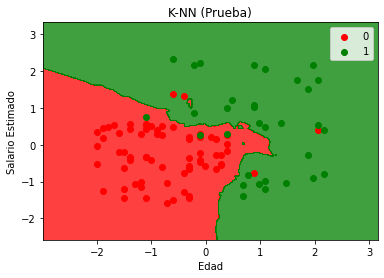

In [35]:
# Visualizacion de los datos de prueba

from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Prueba)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

Por medio de esta grafica se puede observar las dos regiones donde compró es verde y no compró es rojo. Y los 7 elementos que fueron mal clasificados